In [34]:
import tweepy
import time
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import json
import pandas as pd
from config import consumer_key,consumer_secret,access_token,access_token_secret

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
##Taken from class..still dont know how it works..
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [8]:
target_user = ["@BBC","@CBS","@CNN","@FoxNews","@NYTimes"]
sentiment = []

In [9]:
for each in target_user:
    count1 = 0
    
    tweets = api.user_timeline(each,count=100)
    
    for tweet in tweets:
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = count1
        tweet_text = tweet["text"] 
        sentiment.append({"User": each,
                         "Date": tweet["created_at"],
                         "Compound": compound,
                         "Positive": pos,
                         "Negative": neg,
                         "Neutral": neu,
                         "Tweets Ago": count1,
                         "Text": tweet_text})
        count1+=1


    

In [12]:
sentiments_news = pd.DataFrame.from_dict(sentiment)
sentiments_news.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.0000,Tue Mar 20 19:03:04 +0000 2018,0.000,1.000,0.000,Michael Portillo travels across India guided b...,0,@BBC
1,-0.3859,Tue Mar 20 18:33:01 +0000 2018,0.160,0.768,0.071,Can you watch this without laughing? 😹🔊 You'll...,1,@BBC
2,0.3400,Tue Mar 20 17:33:03 +0000 2018,0.102,0.738,0.160,Professor Stephen Hawking's funeral will take ...,2,@BBC
3,0.0000,Tue Mar 20 17:03:01 +0000 2018,0.000,1.000,0.000,Un-bee-lievable! 🐝😍 Meet the woman who kept a ...,3,@BBC
4,0.0000,Tue Mar 20 16:05:04 +0000 2018,0.000,1.000,0.000,"Arise, Sir Ringo! 🎖🎶@thebeatles drummer @ringo...",4,@BBC


In [35]:
sentiments_news.to_csv("News_Sentiment_Twitter.csv", index = False)
Date = dt.now().strftime("(%m/%d/%Y)")

In [51]:
for each in target_user:
    users_df = sentiments_news.loc[sentiments_news["User"] == each]
    plt.scatter(users_df["Tweets Ago"],users_df["Compound"],label = each)

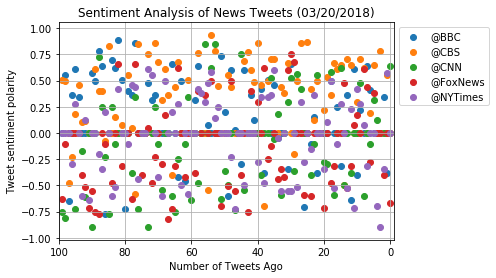

In [52]:
plt.xlim(100,-1)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Sentiment Analysis of News Tweets "+str(Date))
plt.xlabel("Number of Tweets Ago")
plt.ylabel("Tweet sentiment polarity")
plt.savefig("Sentiment Analysis of News Tweets")
plt.grid(True)
plt.show()

In [19]:
avg_sent = sentiments_news.groupby("User")
means_sentiments = avg_sent["Compound"].mean()
means_sentiments.head()

User
@BBC        0.125906
@CBS        0.299721
@CNN       -0.068940
@FoxNews   -0.100056
@NYTimes   -0.038018
Name: Compound, dtype: float64

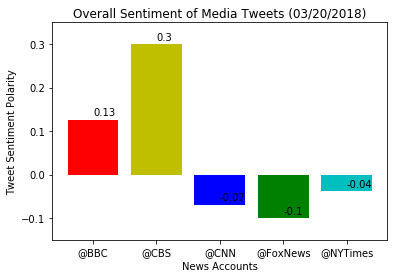

In [46]:
fig, ax = plt.subplots()

x_axis = np.arange(len(means_sentiments))
count2 = 0
count = 0
for sent in means_sentiments:
    ax.text(count2, sent+.01, str(round(sent,2)))
    count2+=1
plt.ylim(-.15,.35)
plt.bar(x_axis, means_sentiments, tick_label = target_user, color = ['r', 'y', 'b', 'g', 'c'])
plt.title("Overall Sentiment of Media Tweets " +str(Date))
plt.xlabel("News Accounts")
plt.ylabel("Tweet Sentiment Polarity")
plt.savefig("Overall Sentiment of News Tweets")
plt.show()